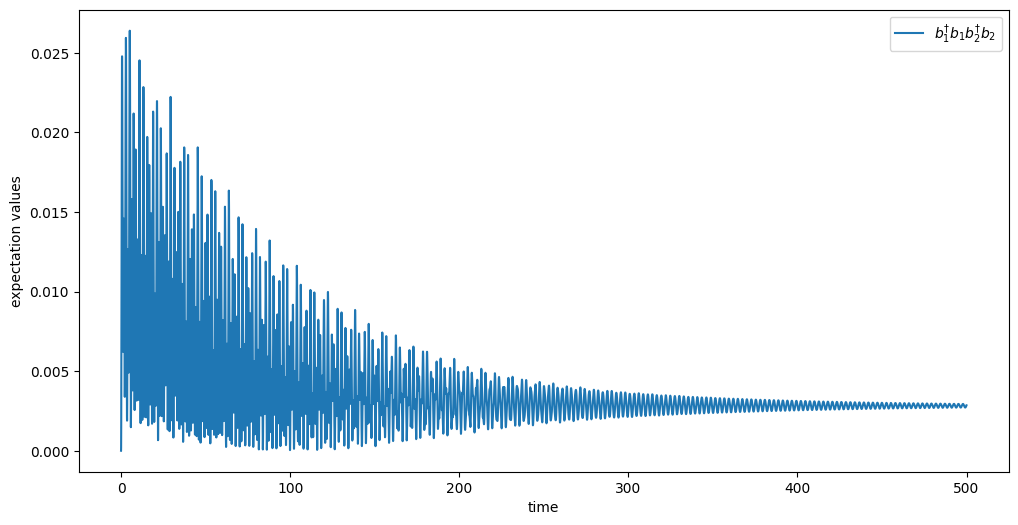

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# 定义算符和初始态
N = 10  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1



# 定义哈密顿量
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1

# 初始态
psi0 = tensor(basis(N, 0), basis(N, 0))  # 两个谐振子的基态

# 时间参数
tlist = np.linspace(0, 500, 10**7)


# 演化系统
result = sesolve(H, psi0, tlist, [b1.dag() * b1 * b2.dag() * b2])

# 提取期望值
n1 = result.expect[0]
# 绘制随时间演化的期望值
plt.figure(figsize=(12, 6))
plt.plot(tlist, n1, label='$b_1^{\dagger}b_1b_2^{\dagger}b_2$')
#plt.plot(tlist, n2, label='$b_2^{\dagger} b_2$')
plt.xlabel('time')
plt.ylabel('expectation values')
plt.legend()
plt.show()

